In [1]:
from __future__ import division
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs

import numpy as np
from matplotlib.colors import SymLogNorm, LogNorm
from astropy.coordinates import SkyCoord
from scipy import ndimage
#from HAWCplot import HAWC_footprint
#from IPython.display import display, Math, Latex #For Latex math symbols

import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

file1 = './current_fits/F0450_HA_POL_unk5_HAWDHWPD_PMP_043-118.fits'

%matplotlib notebook

Read in polarization information. The HDU list for polarimetry is as follows:

0: Stokes I

1: I error 

2: Q 

3: Q error 

4: U

5: U error

6: Image Mask

7: Percent Pol

8: Percent Pol (debiased)

9: Pol error

10: Pol angle

11: Pol Angle (B-field)

12: Angle error

13: Merged data

In [2]:
polfile=fits.open(file1)
w2=wcs.WCS(polfile[0].header)
xpix=polfile[0].header['NAXIS1']
ypix=polfile[0].header['NAXIS2']
data1 = polfile[0].data
polvec = polfile[11].data
rotate = False

## HRO of all the vectors 

<IPython.core.display.Javascript object>


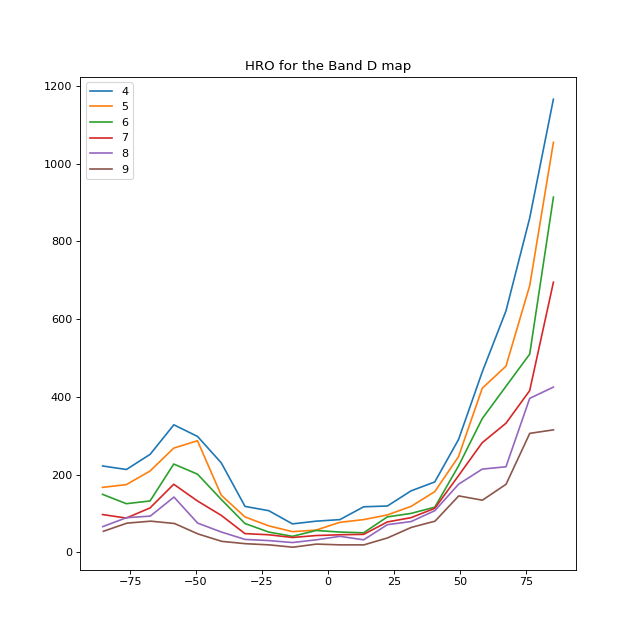

In [3]:
plt.figure(figsize=(8,8))

for i in np.arange(4, 10, 1):
    #plot the whole thing.
    #plt.figure(figsize=(8,8))
    #plt.imshow(np.log10(data1), origin='lower',interpolation='gaussian',cmap=plt.cm.Greys)#,norm=SymLogNorm(linthresh=1600.0, linscale=1,vmin=1.0,vmax=70000))
    #plt.hist(np.log10(data))
    #print data.shape
    deriv_0 = ndimage.gaussian_filter1d(data1,i,axis=0,order=1)
    #plt.imshow(deriv_0, origin='lower',interpolation='gaussian',cmap=plt.cm.Greys)
    #
    #plt.figure(figsize=(8,8))
    deriv_1 = ndimage.gaussian_filter1d(data1,i,axis=1,order=1)
    #plt.imshow(deriv_1, origin='lower',interpolation='gaussian',cmap=plt.cm.Greys)
    #
    #plt.figure(figsize=(8,8))
    grad = np.sqrt(deriv_0**2 + deriv_1**2)
    #plt.imshow(np.log10(grad), origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
    #
    #plt.figure(figsize=(8,8))
    angle = np.arctan2(deriv_0,deriv_1)
    angle = angle*(180./np.pi)
    #plt.imshow(angle, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
    #
    dphi = angle -  polvec
    dphi = dphi.flatten()
    grad = grad.flatten()
    m = np.where(np.isnan(dphi) == False)
    dphi = dphi[m]
    grad = grad[m]
    
    """
    for j in enumerate(dphi):
        if j[1] > 90:
            dphi[j[0]] = 180. - j[1]
        elif j[1] < -90:
            dphi[j[0]] = 180 + j[1]
    """
    
    for k in range(len(dphi)):
            if dphi[k] > 90:
                dphi[k] = 180 - dphi[k]
            elif dphi[k] < -90:
                dphi[k] = 180 + dphi[k]
    #
    #dphi = dphi/grad
    hist, bins = np.histogram(dphi,bins=20)  #, weights = grad)
    center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
    hist = plt.plot(center,hist,label=str(i))
    #plt.colorbar()
plt.legend()
plt.title("HRO for the Band D map")
plt.savefig("All_vetors_stage3.pdf")
plt.show()

## HRO by clustering the intensity of Band D into different Bins

<IPython.core.display.Javascript object>


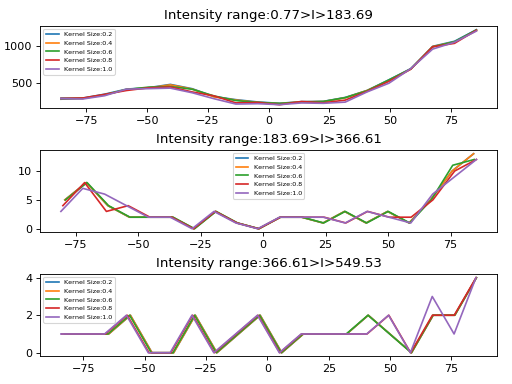

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in less_equal


(9563,) (9563,)
(9450,) (9450,)
(9450,) (9450,)
(9259,) (9259,)
(9032,) (9032,)
(68,) (68,)
(68,) (68,)
(68,) (68,)
(68,) (68,)
(68,) (68,)
(24,) (24,)
(24,) (24,)
(24,) (24,)
(24,) (24,)
(24,) (24,)


In [4]:
data1 = polfile[0].data
data3 = data1.copy()

data5 = data1.copy()
sample_data = data5.flatten()
m = np.where(np.isnan(sample_data) == False)
sample_data = sample_data[m]
hist, bins = np.histogram(sample_data, bins = 3)  # for changing the number of bins
plt.figure()
for i in range(len(bins)-1):
#    plt.figure()
    m1 = np.where((data3 >= bins[i]) & (data3 <= bins[i+1]))
 #   print(m1.shape)

    try:
        plt.subplot(len(hist), 1, i+1)
    except:
        break
    
    for j in np.arange(0.2, 1.2, 0.2):  # for changing the kernel
        polang1 = polfile[11].data
        deriv_0 = ndimage.gaussian_filter1d(data3,j,axis=0,order=1)
        deriv_1 = ndimage.gaussian_filter1d(data3,j,axis=1,order=1)
        grad = np.sqrt(deriv_0**2 + deriv_1**2)
        angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
        angle = angle[m1]
        grad = grad[m1]
        #polang1 = polang1[m1]
        polang1 = polang1[m1]
        dphi = angle -  polang1
        #dphi = dphi.flatten()
        #grad = grad.flatten()
        # print(dphi.shape, grad.shape)

        m2 = np.where(np.isnan(dphi) == False)
        dphi = dphi[m2]
        grad = grad[m2]
        print(dphi.shape, grad.shape)
        for k in range(len(dphi)):
            if dphi[k] > 90:
                dphi[k] = 180 - dphi[k]
            elif dphi[k] < -90:
                dphi[k] = 180 + dphi[k]
                
        """        
        for j in enumerate(dphi):
        if j[1] > 90:
            dphi[j[0]] = 180. - j[1]
        elif j[1] < -90:
            dphi[j[0]] = 180 + j[1]
        """
        
 #       print(dphi.shape, grad.shape)
        hist1, bins1 = np.histogram(dphi, bins = 20) #, weights = grad)
        center1 = (bins1[:-1] + bins1[1:]) / 2
        plt.plot(center1,hist1, label = "Kernel Size:" + str(j))
        plt.legend(fontsize = "xx-small")
        plt.show()
        #plt.title("Center")
    plt.title("Intensity range:" +
              str('{0:.2f}'.format(bins[i])) +
              ">" + "I" + ">" + str('{0:.2f}'.format(bins[i+1])))
    plt.show()
    plt.tight_layout()
    plt.savefig("Intensity_bins_stage3.pdf")
#'{0:.2f}'.format(pi)

<IPython.core.display.Javascript object>


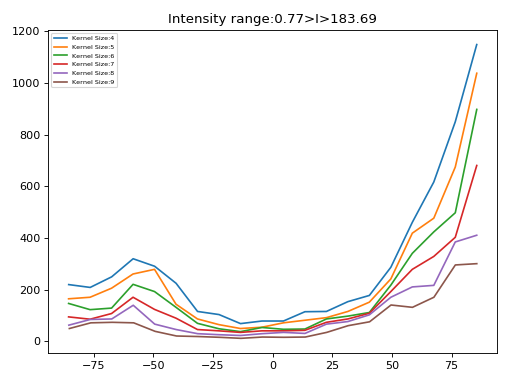

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


In [5]:
data1 = polfile[0].data
data3 = data1.copy()

data5 = data1.copy()
sample_data = data5.flatten()
m = np.where(np.isnan(sample_data) == False)
sample_data = sample_data[m]
hist, bins = np.histogram(sample_data, bins = 3)  # for changing the number of bins
plt.figure()
m1 = np.where((data3 >= bins[0]) & (data3 <= bins[1]))
 #   print(m1.shape)
for j in np.arange(4, 10, 1):  # for changing the kernel
    polang1 = polfile[11].data
    deriv_0 = ndimage.gaussian_filter1d(data3,j,axis=0,order=1)
    deriv_1 = ndimage.gaussian_filter1d(data3,j,axis=1,order=1)
    grad = np.sqrt(deriv_0**2 + deriv_1**2)
    angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
    angle = angle[m1]
    grad = grad[m1]
        #polang1 = polang1[m1]
    polang1 = polang1[m1]
    dphi = angle -  polang1
        #dphi = dphi.flatten()
        #grad = grad.flatten()
        # print(dphi.shape, grad.shape)

    m2 = np.where(np.isnan(dphi) == False)
    dphi = dphi[m2]
    grad = grad[m2]
        
    for k in range(len(dphi)):
        if dphi[k] > 90:
            dphi[k] = 180 - dphi[k]
        elif dphi[k] < -90:
            dphi[k] = 180 + dphi[k]
                
        """        
        for j in enumerate(dphi):
        if j[1] > 90:
            dphi[j[0]] = 180. - j[1]
        elif j[1] < -90:
            dphi[j[0]] = 180 + j[1]
        """
        
 #       print(dphi.shape, grad.shape)
    hist1, bins1 = np.histogram(dphi, bins = 20)  #, weights = grad)
    center1 = (bins1[:-1] + bins1[1:]) / 2
    plt.plot(center1,hist1, label = "Kernel Size:" + str(j))
    plt.legend(fontsize = "xx-small")
    plt.show()
        #plt.title("Center")
plt.title("Intensity range:" +
            str('{0:.2f}'.format(bins[0])) +
            ">" + "I" + ">" + str('{0:.2f}'.format(bins[1])))
plt.show()
plt.tight_layout()
#plt.savefig("Intensity_bins_stage3.pdf")
#'{0:.2f}'.format(pi)

## HRO on the basis of Regions

In [6]:
from matplotlib.path import Path

nx, ny = 142, 158
poly_verts_center = [(071.72, 118.53), (074.01, 109.08), (073.73, 099.93), 
                     (075.44, 091.62), (079.74, 084.18), (080.31, 074.16), 
                     (082.03, 065.00), (089.47, 065.00), (089.18, 076.16), 
                     (090.62, 087.90), (088.61, 102.22), (083.74, 110.52),
                     (079.45, 120.82), (076.87, 126.55), (071.72, 118.53)]
poly_verts_bar = [(27.63, 61.23), (33.36, 54.36), (39.94, 50.64),
                  (50.82, 44.05), (52.25, 46.63), (39.94, 59.22),
                  (32.50, 62.95),(27.63, 61.23)]
poly_verts_other = [(41.00, 69.00), (57.00, 69.00), (57.00, 91.00),
                   (41.00, 91.00), (41.00, 69.00)]

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

#path = Path(poly_verts)
#grid = path.contains_points(points)
#grid = grid.reshape((ny,nx))

#print (grid)
#grid.shape

## For the BNKL Region

<IPython.core.display.Javascript object>


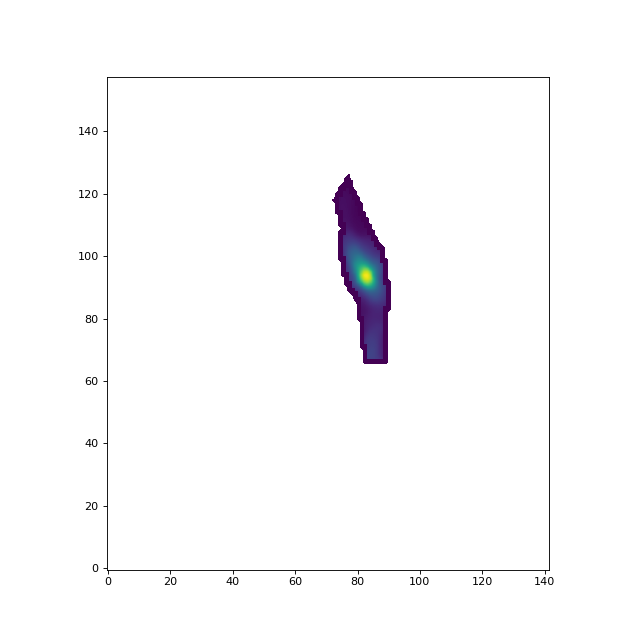

In [7]:
path_center = Path(poly_verts_center)
grid_center = path_center.contains_points(points)
grid_center = grid_center.reshape((ny,nx))
data_center = data1.copy()
data_center = data_center*grid_center
polang_center = polfile[11].data*grid_center
plt.figure(figsize=(8,8))
data_center[np.where(data_center == 0)] = np.nan
plt.imshow(data_center, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.show()
#data_center[np.where(data_center ==0)] = np.nan

<IPython.core.display.Javascript object>


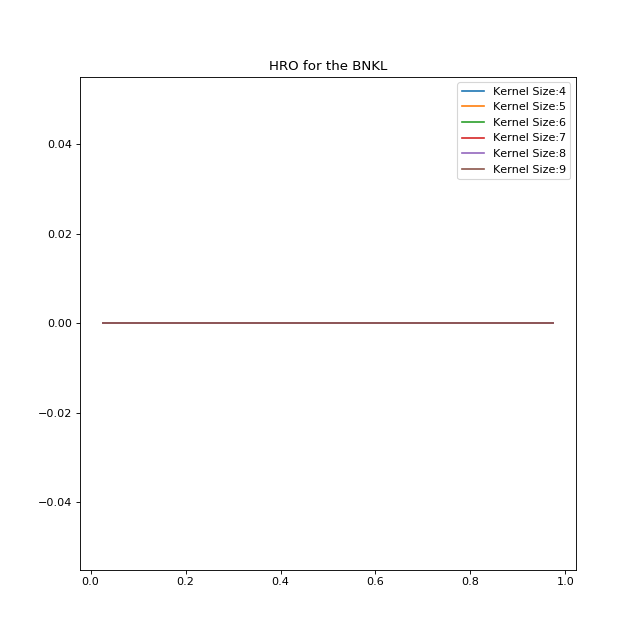

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:236: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:343: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


In [8]:
plt.figure(figsize = (8, 8))
for i in np.arange(4, 10, 1):
    deriv_0 = ndimage.gaussian_filter1d(data_center,i,axis=0,order=1)
    deriv_1 = ndimage.gaussian_filter1d(data_center,i,axis=1,order=1)
    grad = np.sqrt(deriv_0**2 + deriv_1**2)
    print(np.nanmin(grad), np.nanmax(grad))
    angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
    dphi = angle -  polang_center
    dphi = dphi.flatten()
    grad = grad.flatten()
    #print(dphi.shape, grad.shape)
    m2 = np.where(np.isnan(dphi) == False)
    dphi = dphi[m2]
    grad = grad[m2]
#    print(dphi.shape, grad.shape)
    for j in range(len(dphi)):
        if dphi[j] > 90:
            dphi[j] = 180 - dphi[j]
        elif dphi[j] < -90:
            dphi[j] = 180 + dphi[j]
    """
    for j in range(len(dphi)):
        if dphi[j] > 90:
            dphi[j] = abs(dphi[j] - 180) 
    """
    #print(dphi.shape, grad.shape)
    hist, bins = np.histogram(dphi, bins = 20) # , weights = grad)
    center = (bins[:-1] + bins[1:]) / 2
    plt.plot(center,hist, label = "Kernel Size:" + str(i))
    plt.legend()
    plt.title("HRO for the BNKL")
    plt.show()
plt.savefig("BNKL_mask_stage3.pdf")

## For the Bar Region

<IPython.core.display.Javascript object>


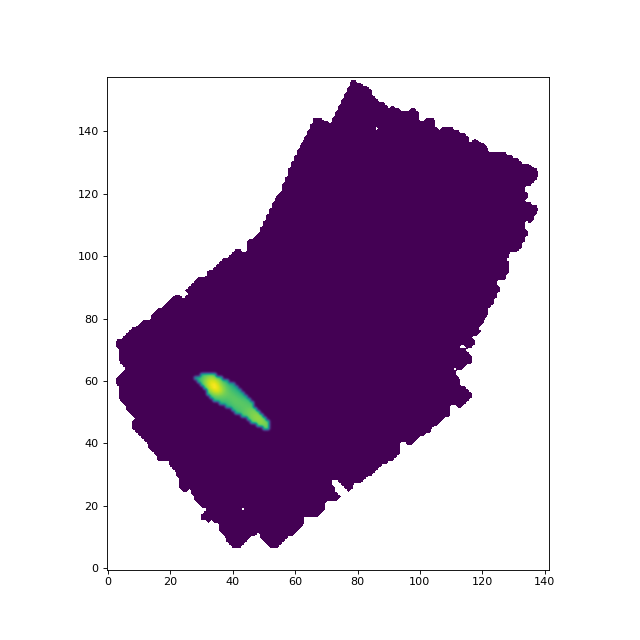

In [9]:
path_bar = Path(poly_verts_bar)
grid_bar = path_bar.contains_points(points)
grid_bar = grid_bar.reshape((ny,nx))
data_bar = data1.copy()
data_bar = data_bar*grid_bar
polang_bar = polfile[11].data*grid_bar
plt.figure(figsize=(8,8))
plt.imshow(data_bar, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.show()

<IPython.core.display.Javascript object>


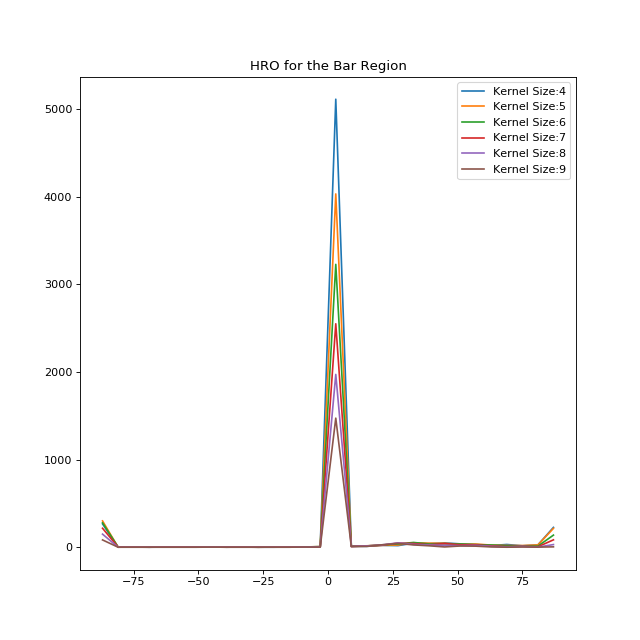

(5981,) (5981,)
(4940,) (4940,)
(4019,) (4019,)
(3168,) (3168,)
(2397,) (2397,)
(1727,) (1727,)


In [10]:
plt.figure(figsize = (8, 8))
for i in np.arange(4, 10, 1):
    deriv_0 = ndimage.gaussian_filter1d(data_bar,i,axis=0,order=1)
    deriv_1 = ndimage.gaussian_filter1d(data_bar,i,axis=1,order=1)
    grad = np.sqrt(deriv_0**2 + deriv_1**2)
    angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
    dphi = angle -  polang_bar
    dphi = dphi.flatten()
    grad = grad.flatten()
    #print(dphi.shape, grad.shape)
    m2 = np.where(np.isnan(dphi) == False)
    dphi = dphi[m2]
    grad = grad[m2]
    print(dphi.shape, grad.shape)
    for j in range(len(dphi)):
        if dphi[j] > 90:
            dphi[j] = 180 - dphi[j]
        elif dphi[j] < -90:
            dphi[j] = 180 + dphi[j]
    """
    for j in range(len(dphi)):
        if dphi[j] > 90:
            dphi[j] = abs(dphi[j] - 180) 
    """
    #print(dphi.shape, grad.shape)
    hist, bins = np.histogram(dphi, bins = 30) #, weights = grad)
    center = (bins[:-1] + bins[1:]) / 2
    plt.plot(center,hist, label = "Kernel Size:" + str(i))
    plt.legend()
    plt.title("HRO for the Bar Region")
    plt.show()
plt.savefig("bar_mask_stage3.pdf")

## For Other Region

<IPython.core.display.Javascript object>


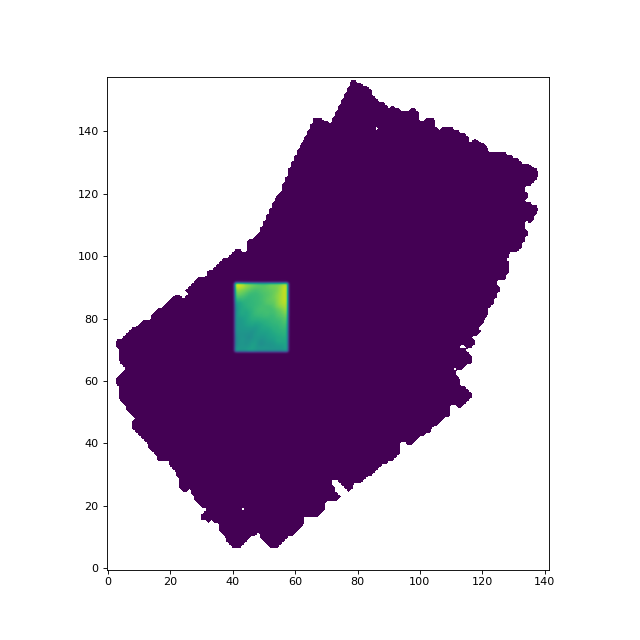

In [11]:
path_other = Path(poly_verts_other)
grid_other = path_other.contains_points(points)
grid_other = grid_other.reshape((ny,nx))
data_other = data1.copy()
data_other = data_other*grid_other
polang_other = polfile[11].data*grid_other
plt.figure(figsize=(8,8))
plt.imshow(data_other, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.show()


<IPython.core.display.Javascript object>


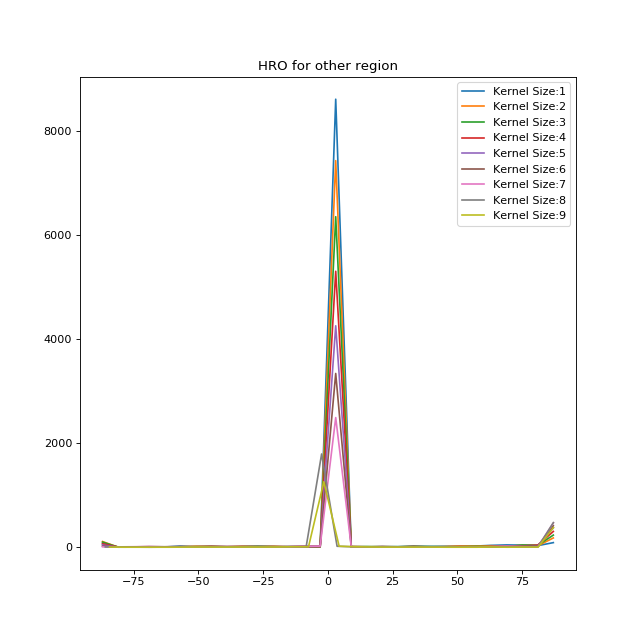

(9124,) (9124,)
(8051,) (8051,)
(7018,) (7018,)
(5981,) (5981,)
(4940,) (4940,)
(4019,) (4019,)
(3168,) (3168,)
(2397,) (2397,)
(1727,) (1727,)


In [12]:
plt.figure(figsize = (8, 8))
for i in np.arange(1, 10, 1):
    deriv_0 = ndimage.gaussian_filter1d(data_other,i,axis=0,order=1)
    deriv_1 = ndimage.gaussian_filter1d(data_other,i,axis=1,order=1)
    grad = np.sqrt(deriv_0**2 + deriv_1**2)
    angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
    dphi = angle -  polang_other
    dphi = dphi.flatten()
    grad = grad.flatten()
    #print(dphi.shape, grad.shape)
    m2 = np.where(np.isnan(dphi) == False)
    dphi = dphi[m2]
    grad = grad[m2]
    print(dphi.shape, grad.shape)
    for j in range(len(dphi)):
        if dphi[j] > 90:
            dphi[j] = 180 - dphi[j]
        elif dphi[j] < -90:
            dphi[j] = 180 + dphi[j]
    """
    for j in range(len(dphi)):
        if dphi[j] > 90:
            dphi[j] = abs(dphi[j] - 180) 
    """
    #print(dphi.shape, grad.shape)
    hist, bins = np.histogram(dphi, bins = 30)  #, weights = grad)
    center = (bins[:-1] + bins[1:]) / 2
    plt.plot(center,hist, label = "Kernel Size:" + str(i))
    plt.legend()
    plt.title("HRO for other region")
    plt.show()
plt.savefig("other_mask_stage3.pdf")